<a href="https://colab.research.google.com/github/KishorAlagappan/Task-7-Machine-Learning-/blob/main/Random_Forest_Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")


In [3]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [4]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [5]:
X=data.drop(columns=['Purchased','Gender','User ID'])
Y=data['Purchased']

In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

**Feature Scaling**

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [10]:
randomforest=RandomForestClassifier(max_depth=88,n_estimators=5,random_state=10)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=88, n_estimators=5, random_state=10)

**Predicting the Test set results**

In [11]:
y_pred=randomforest.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [12]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,45,7,52
1,2,26,28
All,47,33,80


**Visualising the Training set results**

In [13]:
training_score = randomforest.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 96.5625


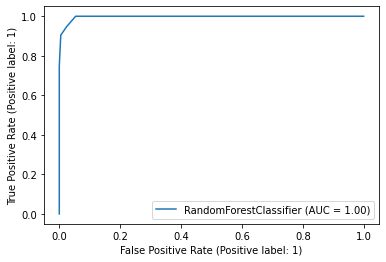

In [14]:
RocCurveDisplay.from_estimator(randomforest,x_train,y_train)

**Visualising the Test set results**

In [15]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 88.75


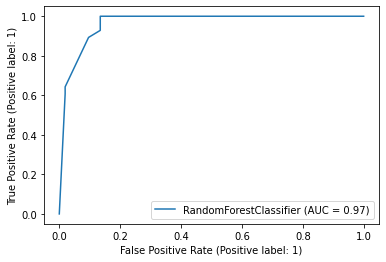

In [16]:
RocCurveDisplay.from_estimator(randomforest,x_test,y_test)